# **Data Input and Prepocessing**

we are going to use XLM-roBERTa for this sentiment analysis, it is a robust and advanced model, capable of 100+ languages and full words (no need stopwords removal)

In [1]:
##Install Required Libraries
%pip install pandas matplotlib seaborn nltk emoji

Note: you may need to restart the kernel to use updated packages.


In [2]:
##Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import string
import nltk
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [3]:
##Merge the datasets and add a column to differentiate between AI sources
file_list = ["claude.csv", "deepseek.csv", "gemini.csv", "gpt.csv", "grok.csv", "perplexity.csv"]
df_list = []
for file in file_list:
    df = pd.read_csv(file)
    df['Source'] = file
    df_list.append(df)

merged_df = pd.concat(df_list, ignore_index=True)

display(merged_df.shape)
display(df.info())
merged_df.sample(frac=1).head(10)

(130885, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12484 entries, 0 to 12483
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Comment     12483 non-null  object
 1   At          12484 non-null  object
 2   AppVersion  11321 non-null  object
 3   Sentiment   12484 non-null  int64 
 4   Source      12484 non-null  object
dtypes: int64(1), object(4)
memory usage: 487.8+ KB


None

,Comment,At,AppVersion,Sentiment,Source
96607,lovery,2025-06-11 16:52:27,NaN,2,grok.csv
44648,so much good,2025-05-22 18:13:24,1.0.751104895,2,gemini.csv
23801,good ai ?,2025-03-29 13:35:23,1.0.686588308,2,gemini.csv
84170,best app so far.,2025-05-07 04:30:31,1.2025.105,2,gpt.csv
37516,It is not available to generate image Google m...,2024-08-10 07:06:58,1.0.657262185,0,gemini.csv
62854,this is the best this I have ever seen this ap...,2025-06-23 03:43:16,1.2025.168,2,gpt.csv
104310,Current Best LLM.,2025-03-19 07:19:05,0.2.8,2,grok.csv
67028,improvement is required,2025-05-10 10:09:19,1.2025.105,2,gpt.csv
110339,Great stuff!,2025-03-10 22:40:24,NaN,2,grok.csv
101570,good 👍🏻😊,2025-03-28 09:09:04,0.3.2,2,grok.csv


In [4]:
##Display missing values
display(df.isnull().sum())
df.isnull().sum()/df.shape[0]*10

Comment          1
At               0
AppVersion    1163
Sentiment        0
Source           0
dtype: int64

Comment       0.000801
At            0.000000
AppVersion    0.931592
Sentiment     0.000000
Source        0.000000
dtype: float64

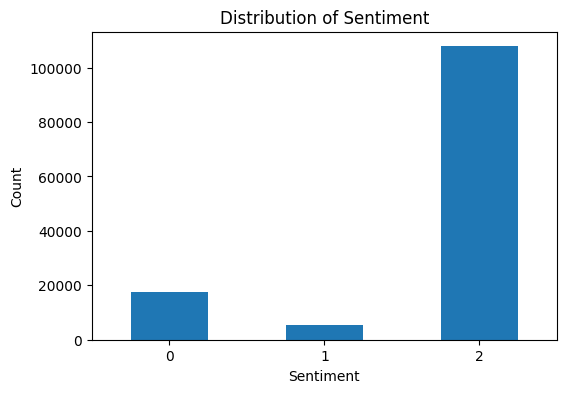

In [5]:
##Distribution of the "Sentiment" column
sentiment_counts = merged_df['Sentiment'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind='bar', rot=0)
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['0', '1', '2'])
plt.show()

 **Date and Time Conversion**

In [6]:
##Date and time conversion
merged_df['At'] = pd.to_datetime(merged_df['At'], format='%Y-%m-%d %H:%M:%S')

In [7]:
##Rename the 'At' column to 'Timestamp'
merged_df = merged_df.rename(columns={'At': 'Timestamp'})

merged_df.info()
display(merged_df.head(10))
merged_df.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130885 entries, 0 to 130884
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Comment     130880 non-null  object        
 1   Timestamp   130885 non-null  datetime64[ns]
 2   AppVersion  117792 non-null  object        
 3   Sentiment   130885 non-null  int64         
 4   Source      130885 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 5.0+ MB


,Comment,Timestamp,AppVersion,Sentiment,Source
0,Ridiculous how we are limited when paying!,2025-06-10 21:24:17,1.250609.27,2,claude.csv
1,love this app but would like a download icon t...,2025-04-05 21:24:04,1.250331.7,2,claude.csv
2,perfect AI i can't compare with even Chatgpt t...,2025-05-30 08:17:46,1.250526.17,2,claude.csv
3,"can't access projects directly yet, but still ...",2024-08-17 17:31:07,1.240812.7,2,claude.csv
4,very good app,2025-06-16 18:33:42,1.250602.7,2,claude.csv
5,"it's a absolutely amazing AI, I asked chat GPT...",2025-06-05 05:11:33,1.250602.7,2,claude.csv
6,The best!,2024-08-29 10:40:50,1.240826.27,2,claude.csv
7,slick AF,2024-10-28 13:44:08,1.241021.17,2,claude.csv
8,I shared on my page but was not able to upgrad...,2024-10-19 21:54:37,1.241021.7,2,claude.csv
9,no NSFW,2025-06-03 04:44:19,1.250519.17,0,claude.csv


,Comment,Timestamp,AppVersion,Sentiment,Source
130875,good,2025-06-24 15:26:20,2.47.1,2,perplexity.csv
130876,Redirection from other apps is great,2025-04-20 16:22:08,2.42.0,2,perplexity.csv
130877,Good 👍,2023-07-10 13:32:07,1.0.26,2,perplexity.csv
130878,It is amazing you have there different AU alon...,2025-02-23 12:39:59,NaN,2,perplexity.csv
130879,I think It's the best app there I got to use i...,2024-02-11 14:13:57,2.11.0,2,perplexity.csv
130880,brilliant,2024-10-26 13:33:11,2.31.2,2,perplexity.csv
130881,"Amazing experience, very insightful, loving it",2024-02-03 10:53:13,2.10.0,2,perplexity.csv
130882,"all data from Google and other websites, nothi...",2024-01-14 08:39:02,2.9.0,0,perplexity.csv
130883,"I used several AI platforms, and like them all...",2025-06-28 13:22:14,2.47.0,2,perplexity.csv
130884,excellent,2025-04-17 15:24:27,2.43.1,2,perplexity.csv


**Handling Missing Values**

In [8]:
# Sort by the 'Timestamp' column for forwardfill the missing values
merged_df = merged_df.sort_values(by='Timestamp')

display(merged_df.head(10))
display(merged_df.tail(10))
display(merged_df.isnull().sum())

,Comment,Timestamp,AppVersion,Sentiment,Source
118649,Perplexity became my go to research tool and g...,2023-05-30 16:43:36,1.0.16,2,perplexity.csv
130414,Cool I'm the first rater of this app ❤️,2023-05-30 17:03:25,1.0.16,2,perplexity.csv
128325,Great,2023-05-30 17:11:38,1.0.16,2,perplexity.csv
118796,Finally...my favorite AI chatbot came out for ...,2023-05-30 17:43:26,1.0.16,2,perplexity.csv
125746,Op,2023-05-30 17:49:43,1.0.16,2,perplexity.csv
127159,Love the dark theme and excellent app,2023-05-30 18:01:33,1.0.16,2,perplexity.csv
127708,Has error when trying to sign up with Google.,2023-05-30 18:19:00,1.0.16,2,perplexity.csv
122099,Perplexity AI is an amazing app that has manag...,2023-05-30 18:21:07,1.0.16,2,perplexity.csv
120194,So amazing been waiting for the Android app fo...,2023-05-30 19:00:46,1.0.16,2,perplexity.csv
118864,I have been waiting for this app since forever ♾️,2023-05-30 19:01:26,1.0.16,2,perplexity.csv


,Comment,Timestamp,AppVersion,Sentiment,Source
73114,amazing,2025-07-08 04:38:03,1.2025.182,2,gpt.csv
126789,complete answer,2025-07-08 04:39:59,2.49.3,2,perplexity.csv
70638,I think it's just that I need,2025-07-08 04:48:02,1.2025.182,0,gpt.csv
91688,super,2025-07-08 04:51:55,1.2025.175,2,gpt.csv
70169,best,2025-07-08 04:55:40,1.2025.175,2,gpt.csv
91732,it's good,2025-07-08 04:58:22,1.2025.182,0,gpt.csv
59203,good 👍,2025-07-08 04:59:22,1.2025.168,0,gpt.csv
91188,I love 😘 this,2025-07-08 04:59:45,1.2025.182,2,gpt.csv
42735,This is very good app,2025-07-08 05:00:35,1.0.772404132,2,gemini.csv
59040,It is awsome,2025-07-08 05:05:22,1.2025.182,2,gpt.csv


Comment           5
Timestamp         0
AppVersion    13093
Sentiment         0
Source            0
dtype: int64

In [9]:
## Forward fill missing values in the 'AppVersion' column
merged_df['AppVersion'] = merged_df['AppVersion'].ffill()

In [10]:
## Drop rows with missing 'Comment' values
merged_df = merged_df.dropna(subset=['Comment'])
merged_df.isnull().sum()

Comment       0
Timestamp     0
AppVersion    0
Sentiment     0
Source        0
dtype: int64

In [11]:
## AppVersion Standarization
merged_df = pd.DataFrame(merged_df)

merged_df['AppVersion_Clean'] = merged_df['AppVersion'].astype(str).str.extract(r'(\d+(\.\d+)*)')[0]

merged_df = merged_df.drop('AppVersion', axis=1)

print(merged_df[['AppVersion_Clean']])

       AppVersion_Clean
118649           1.0.16
130414           1.0.16
128325           1.0.16
118796           1.0.16
125746           1.0.16
...                 ...
91732        1.2025.182
59203        1.2025.168
91188        1.2025.182
42735     1.0.772404132
59040        1.2025.182

[130880 rows x 1 columns]


**Lexicon Conversion**

By using XLM-RoBERTa, we dont need to do lowercase conversion, stemming, lemmatization, punctuation, and stopwords removal, as these prepocessing can remove valuables insights from the words itself and hurt the XLM-RoBERTa's performance

In [12]:
## URLs Removal
import re

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

merged_df['clean'] = merged_df['Comment'].apply(lambda x: remove_urls(str(x)))

## HTML tags Removal
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

merged_df['clean'] = merged_df['clean'].apply(remove_html)

merged_df.sample(frac=1).head(10)

,Comment,Timestamp,Sentiment,Source,AppVersion_Clean,clean
40505,great 😃👍🏽,2024-11-15 17:24:50,2,gemini.csv,1.0.668480831,great 😃👍🏽
2465,It does not work at all! Chats are constantly ...,2024-08-24 10:29:35,0,claude.csv,1.0.662093464,It does not work at all! Chats are constantly ...
44093,Great,2025-03-23 01:22:38,2,gemini.csv,1.0.686588308,Great
39802,good atall,2025-02-08 05:24:35,1,gemini.csv,1.0.686588308,good atall
24310,thanks so much 😊,2024-10-21 11:28:29,2,gemini.csv,1.0.668480831,thanks so much 😊
36429,nice 🙂,2025-07-01 15:28:01,2,gemini.csv,1.0.751104895,nice 🙂
55905,ok good 👍😊👍👍👍,2025-07-04 10:45:48,2,gemini.csv,1.0.772404132,ok good 👍😊👍👍👍
65201,ChatGPT is Awesome,2025-04-20 18:30:25,2,gpt.csv,1.2025.091,ChatGPT is Awesome
74849,good at math,2025-04-19 00:39:07,2,gpt.csv,1.2025.007,good at math
5684,great,2024-11-13 22:54:21,2,claude.csv,1.241111.7,great


In [13]:
#Handling Emojis by converting them to text
import emoji

def convert_emojis(text):
    return emoji.demojize(str(text))

merged_df['clean'] = merged_df['clean'].apply(convert_emojis)

merged_df.sample(frac=1).head(10)

,Comment,Timestamp,Sentiment,Source,AppVersion_Clean,clean
5219,"excellent. thank you, Claude",2025-01-11 08:55:13,2,claude.csv,1.250106.7,"excellent. thank you, Claude"
100260,very nice,2025-03-31 12:39:10,2,grok.csv,0.3.3,very nice
63961,good,2025-06-28 18:18:58,2,gpt.csv,1.2025.168,good
56054,Amazing,2024-08-19 13:06:30,2,gemini.csv,1.0.662093464,Amazing
70873,op app,2025-06-10 15:15:05,2,gpt.csv,1.2025.154,op app
40482,excellent because it's free,2024-08-26 17:20:26,2,gemini.csv,1.0.662093464,excellent because it's free
21798,Thanks CHINA,2025-03-11 06:00:48,2,deepseek.csv,1.1.1,Thanks CHINA
83884,good,2025-04-09 17:56:21,2,gpt.csv,1.2025.091,good
64028,very useful. So I'm happy,2025-05-29 14:46:13,0,gpt.csv,1.2025.140,very useful. So I'm happy
42477,good 💯💯,2025-04-27 08:09:41,2,gemini.csv,1.0.741105040,good :hundred_points::hundred_points:


# **Model Training**

In [ ]:
%pip install transformers torch scikit-learn datasets
#takes 10mins to run

In [15]:
print("All necessary libraries are installed and imported.")

All necessary libraries are installed and imported.
